## Project 2 

I have chosen the following untidy datasets: pizza data, student results, and video game sales

The following is my analysis of the pizza data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pizza = pd.read_csv("https://raw.githubusercontent.com/pdelro/IS362/main/Week%206/pizza_data.csv")

To display the types of data in the file, I will just show the first five entries


In [3]:
pizza.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


I will now determine if there are any NaN values in the DataFrame


In [4]:
pizza.isnull().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

To analyze the data, I will now identify how many unique variables there are in each category


In [5]:
pizza.nunique()

Company         4
Pizza Name    247
Type            9
Size           11
Price          56
dtype: int64

I will now identify the unique companies


In [6]:
companies = (pizza['Company'].unique())
companies

array(["Domino's Pizza", 'Pizza Hut', "Godfather's Pizza", "IMO's Pizza"],
      dtype=object)

I will now identify which company has the most kinds of pizza and display it in a graph


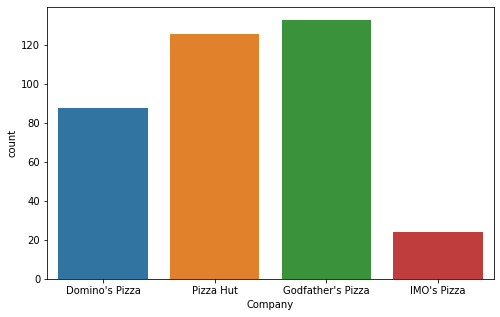

In [7]:
plt.figure(figsize = (8,5))
pizza_count = sns.countplot(pizza['Company'])


According to the bar graph, Godfather's Pizza has the most kinds of pizza.

I will now identify the unique types of pizza


In [8]:
types = (pizza['Type'].unique())
types

array(['Cheeses Pizza', 'Specialty Pizzas', 'Feast Pizzas',
       'Cheese Pizza', 'Classic Recipe Pizzas', 'New Recipe Pizzas',
       'Skinny Pizzas', 'Gluten-Free Pizzas', 'Express Favorites'],
      dtype=object)

I will now show how many pizzas there are of each type and display it in a bar graph


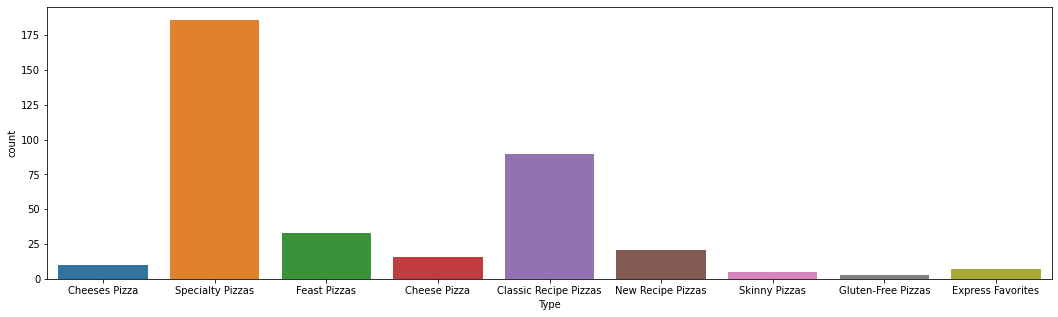

In [9]:
plt.figure(figsize = (18,5))
pizza_type = sns.countplot(pizza['Type'])

Specialty pizzas is the most prevalent

I will now identify the different sizes of pizza


In [10]:
sizes = (pizza['Size'].unique())
sizes

array(['Small (10")', 'Medium (12")', 'Large (14")', 'X-Large (16")',
       'Medium', 'Large', 'Personal', 'Small', 'Mini', 'Jumbo',
       'X Large (16")'], dtype=object)

I'm going to clean up the size descriptions by excluding the pizza diameters

In [11]:
def mod_size(size):
    return size.split(" (")[0]
pizza['Size'] = pizza['Size'].apply(lambda x: mod_size(x))

#show that they have been consolidated
sizes = (pizza['Size'].unique())
sizes

array(['Small', 'Medium', 'Large', 'X-Large', 'Personal', 'Mini', 'Jumbo',
       'X Large'], dtype=object)

There is still a duplicate. I will now consolidate the X Large by replacing the variable name

In [12]:
pizza['Size'] = pizza['Size'].replace(['X-Large'], 'X Large')
consolidated_sizes = (pizza['Size'].unique())
consolidated_sizes

array(['Small', 'Medium', 'Large', 'X Large', 'Personal', 'Mini', 'Jumbo'],
      dtype=object)

I will now display the number of each size pizza in a bar graph

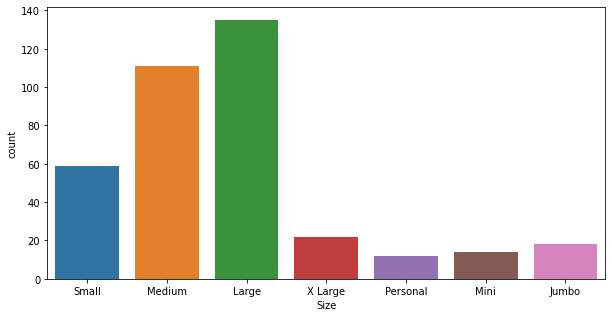

In [13]:
plt.figure(figsize = (10,5))
pizza_size = sns.countplot(pizza['Size'])

Lastly, I will sort the pizzas by size and price for each company

In [14]:
dominos = pizza[(pizza["Company"]=="Domino's Pizza")]
dominos.sort_values(by = ["Size", 'Price'], ascending=False)

,Company,Pizza Name,Type,Size,Price
13,Domino's Pizza,Spinach & Feta (Brooklyn Style),Specialty Pizzas,X Large,$17.99
18,Domino's Pizza,Wisconsin 6 Cheese (Brooklyn Style),Specialty Pizzas,X Large,$17.99
23,Domino's Pizza,Honolulu Hawaiian (Brooklyn Style),Specialty Pizzas,X Large,$17.99
28,Domino's Pizza,Philly Cheese Steak (Brooklyn Style),Specialty Pizzas,X Large,$17.99
33,Domino's Pizza,Pacific Veggie (Brooklyn Style),Specialty Pizzas,X Large,$17.99
...,...,...,...,...,...
64,Domino's Pizza,"Bacon Cheeseburger Feast® (Hand Tossed, Thin C...",Feast Pizzas,Large,$15.99
70,Domino's Pizza,"Deluxe Feast® (Hand Tossed, Thin Crust or Broo...",Feast Pizzas,Large,$15.99
75,Domino's Pizza,"ExtravaganZZa Feast® (Hand Tossed, Thin Crust ...",Feast Pizzas,Large,$15.99
80,Domino's Pizza,"MeatZZa Feast® (Hand Tossed, Thin Crust or Bro...",Feast Pizzas,Large,$15.99


In [15]:
pizza_hut = pizza[(pizza["Company"] == "Pizza Hut")]
pizza_hut.sort_values(by = ["Size", 'Price'], ascending=False)

,Company,Pizza Name,Type,Size,Price
213,Pizza Hut,Create Your Own (Gluten-Free Crust),Gluten-Free Pizzas,Small,$9.99
153,Pizza Hut,Chicken Supreme Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,$5.29
180,Pizza Hut,Super Supreme Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,$5.29
99,Pizza Hut,Pepperoni Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,$4.79
108,Pizza Hut,Meat Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,$4.79
...,...,...,...,...,...
95,Pizza Hut,Stuffed Crust,Cheese Pizza,Large,$12.49
89,Pizza Hut,Hand-Tossed,Cheese Pizza,Large,$10.49
92,Pizza Hut,Pan Pizza,Cheese Pizza,Large,$10.49
94,Pizza Hut,Thin N Crispy,Cheese Pizza,Large,$10.49


In [16]:
godfathers = pizza[(pizza["Company"]== "Godfather's Pizza")]
godfathers.sort_values(by = ["Size", 'Price'], ascending=False)

,Company,Pizza Name,Type,Size,Price
290,Godfather's Pizza,Super Combo Pizza (Original or Golden Crust),Specialty Pizzas,Small,$16.99
296,Godfather's Pizza,Super Hawaiian Pizza (Original or Golden Crust),Specialty Pizzas,Small,$16.99
302,Godfather's Pizza,Super Taco Pizza (Original or Golden Crust),Specialty Pizzas,Small,$16.99
308,Godfather's Pizza,The Don (Original or Golden Crust),Specialty Pizzas,Small,$16.99
222,Godfather's Pizza,All-Meat Combo Pizza (Original or Golden Crust),Specialty Pizzas,Small,$15.99
...,...,...,...,...,...
289,Godfather's Pizza,Buffalo Chicken Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,$27.99
326,Godfather's Pizza,"BBQ Bacon Cheeseburger Pizza (Original, Golden...",Specialty Pizzas,Jumbo,$27.99
333,Godfather's Pizza,"Chipotle Chicken and Bacon Pizza (Original, Go...",Specialty Pizzas,Jumbo,$27.99
346,Godfather's Pizza,Original or Thin Crust,Express Favorites,Jumbo,$21.99


In [17]:
imos = pizza[(pizza["Company"]== "IMO's Pizza")]
imos.sort_values(by = ["Size", 'Price'], ascending=False)

,Company,Pizza Name,Type,Size,Price
350,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,X Large,$23.85
354,IMO's Pizza,Veggie Pizza,Specialty Pizzas,X Large,$23.85
362,IMO's Pizza,All Meat Pizza,Specialty Pizzas,X Large,$23.85
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,X Large,$23.85
370,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,X Large,$22.30
358,IMO's Pizza,Cheese Pizza,Specialty Pizzas,X Large,$17.35
355,IMO's Pizza,Cheese Pizza,Specialty Pizzas,Small,$9.30
347,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,Small,$12.70
351,IMO's Pizza,Veggie Pizza,Specialty Pizzas,Small,$12.70
359,IMO's Pizza,All Meat Pizza,Specialty Pizzas,Small,$12.70
